# What is Causal Inference?

Causal Inference is the process where causes are **inferred** from data.

Causal inference is the process of determining the independent, actual effect of a particular phenomenon that is a component of a larger system. Causal inference analyzes the ***response of an effect variable when a cause of the effect variable is changed***.

<div>
<img src="https://paulvanderlaken.files.wordpress.com/2019/10/causal-inference-book-cover-21.jpeg?w=1024&h=737&crop=1" width="500"/>
</div>

# Correlation does not imply Causation

<div>
<img src="https://imgs.xkcd.com/comics/correlation_2x.png" width="500"/>
</div>

<div>
<img src="https://www.freecodecamp.org/news/content/images/2019/09/Ridiculous-correlation.png" width="800"/>
</div>

<div>
<img src="https://www.statology.org/wp-content/uploads/2021/08/corrCause1.png" width="500"/>
</div>

# Notations

<div>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXbbY0NvMAE4TGAkPk8Ou9a9u4U9DWzsK0E3MHlsNGyrEiIojX_QhdSbenkkmH-_I7BOk" width="300"/>
</div>

+ **Treatment**: Intervention for which we want to know the effect

$T_{i} = \left\{\begin{matrix}
1 \; if \; treatment \; is \; recived\\ 
0 \; otherwise
\end{matrix}\right.$


+ **Control**: Opposite of treatment
+ **Outcome**: Our variable of interest
        Y(0) potential outcome without the treatment
        Y(1) potential outcome with the treatment
+ **Treatment effect**
        Y(1) - Y(0) for an individual unit
Average Treatment Effect = $\frac{1}{N}\sum Y(1) - Y(0)$  

+ **Confounders**: A variable which affects both treatment and outcome

<div>
<img src="https://imgs.xkcd.com/comics/confounding_variables_2x.png" width="700"/>
</div>

# Problem with causal infrence

The fundamental problem of causal inference is that we can **never observe the same unit with and without treatment**.

Analysis can be on two types of data:
- Experimental data - Randomized control trials (RCT)
- Observational data

RCT can be expensive, operationally heavy, and sometimes unethical. We are going to focus on Observational data today.

Since we can not observe the same unit with and without treatment and some sort of confounder X makes it so that treated and untreated are not initially comparable, I can make them so by matching each treated unit with a similar untreated unit.

# Propensity Score Matching

Propensity score comes from the realisation that you don’t need to directly control for confounders X to achieve conditional independence $Y(0),Y(1) \perp T\mid X$. Instead, it is sufficient to control for a balancing score $E[T\mid X]$. This balancing score is often the conditional probability of the treatment,$P(T\mid X)$ also called the propensity score $P(x)$.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from tqdm.notebook import tqdm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("learning_mindset.csv")
data

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1,0,0.808867,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10387,1,0,-0.156063,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10388,1,0,0.370820,2,15,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10389,1,0,-0.396297,5,4,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702


In [3]:
# data.query("intervention==1")["achievement_score"].mean() - med.query("intervention==0")["achievement_score"].mean()

In [4]:
T = 'intervention'
Y = 'achievement_score'
X = data.columns.drop(['schoolid', T, Y])

In [5]:
ps_model = LogisticRegression(C=1e6).fit(data[X], data[T])

In [6]:
data_ps = data.assign(propensity_score=ps_model.predict_proba(data[X])[:, 1])

In [7]:
data_ps

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size,propensity_score
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.309141
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.263645
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.339055
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.339055
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.361268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1,0,0.808867,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702,0.323350
10387,1,0,-0.156063,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702,0.323350
10388,1,0,0.370820,2,15,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702,0.235580
10389,1,0,-0.396297,5,4,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702,0.300490


/Users/hitkul/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hitkul/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


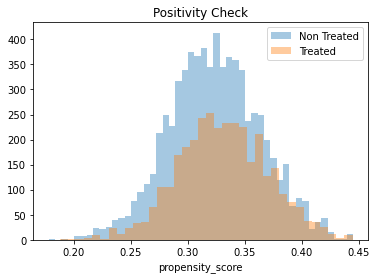

In [8]:
sns.distplot(data_ps.query("intervention==0")["propensity_score"], kde=False, label="Non Treated")
sns.distplot(data_ps.query("intervention==1")["propensity_score"], kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

notice the distribution is very different from what you would have for a good clasification model

In [9]:
ps = data_ps['propensity_score'].values

In [10]:
logit_p = np.log(ps/(1-ps))

In [11]:
caliper = 0.25 * np.std(logit_p)

In [12]:
caliper

0.04593774264781713

In [13]:
control_ids = data_ps[data_ps['intervention']==0].index
treatment_ids = data_ps[data_ps['intervention']==1].index

In [14]:
matched_pairs = {}

In [15]:
for tid in tqdm(treatment_ids):
    matched_pairs[tid] = []
    for cid in control_ids:
        matched_pairs[tid].append((abs(data_ps['propensity_score'].iloc[tid] - data_ps['propensity_score'].iloc[cid]),cid))

  0%|          | 0/3384 [00:00<?, ?it/s]

In [16]:
for tid in tqdm(treatment_ids):
    matched_pairs[tid] = [i for i in matched_pairs[tid] if i[0]<caliper]

  0%|          | 0/3384 [00:00<?, ?it/s]

In [17]:
matched_pairs_final = {}
for k,v in matched_pairs.items():
    matched_pairs_final[k] = min(v)

In [18]:
SMD = {col:{'t_values':[],'c_values':[],'SMD':None} for col in X}

In [19]:
for k,v in matched_pairs_final.items():
    for col in X:
        SMD[col]['t_values'].append(data_ps[col].iloc[k])
        SMD[col]['c_values'].append(data_ps[col].iloc[v[1]])

In [20]:
for k,v in SMD.items():
    num = np.mean(v['t_values'])-np.mean(v['c_values'])
    dom = ((np.std(v['t_values'])**2) + (np.std(v['c_values'])**2))/2
    v['SMD'] = num/np.sqrt(dom)

In [21]:
for k,v in SMD.items():
    print(k, v['SMD'])

success_expect -0.004972157525117839
ethnicity 0.06875921774937616
gender -0.005326962675615038
frst_in_family -0.016311798085651086
school_urbanicity 0.0070684898896231
school_mindset 0.003702529166192529
school_achievement -0.013579490024597553
school_ethnic_minority 0.0027734427072040086
school_poverty 0.01009831044334629
school_size -0.003060786565531969


SMD should be <0.25

In [22]:
ATE = []

In [23]:
for k,v in matched_pairs_final.items():
    ATE.append(data_ps['achievement_score'].iloc[k] - data_ps['achievement_score'].iloc[v[1]])

In [24]:
np.mean(ATE)

0.3713493017126297

# But this is just scratching the surface

<div>
<img src="https://matheusfacure.github.io/python-causality-handbook/_images/explain.png" width="400"/>
</div>

### Models I would suggest you have a look at 
+ Matching
+ Propensity Score
+ RDD
+ Diff-in-Diff
+ Survival Regression

### Source

+ https://matheusfacure.github.io/python-causality-handbook/landing-page.html

+ https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2021/03/ciwhatif_hernanrobins_30mar21.pdf

+ https://www.wiley.com/en-us/Causal+Inference+in+Statistics%3A+A+Primer-p-9781119186847

+ https://mixtape.scunning.com/